# Scrap data from derived Table

In [2]:
import psycopg2
import numpy as np
import pandas as pd

conn = None
cur = None

try:
    conn = psycopg2.connect(host='localhost', dbname='postgres', user='postgres', password='mypass', port=5431)
    cur = conn.cursor()

    cur.execute("select * from transform_stock")
    conn.commit()
    li=[]
    for i in cur.fetchall():
        li.append(i)

    cur.execute("""
        select column_name, data_type
        from information_schema.columns
        where table_schema='public'
        and table_name = 'transform_stock';
        """)
    columns = cur.fetchall()
    col=[]
    for c,_ in columns:
        col.append(c)

except Exception as e:
    print(e)
finally:
    if cur is not None:
        cur.close()
    if conn is not None:
        conn.close()

In [3]:
col = []
for c,_ in columns:
    col.append(c)
# col

In [4]:
import pandas as pd

df = pd.DataFrame(li,columns=col)
df

,id,name,cmp_rs,mar_cap_rscr,div_yld_percent,np_qtr_rscr,qtr_profit_var_percent,qtr_sales_var_percent,roce_percent,roe_percent,...,profit_growth_percent,no_of_share_holders,eps_12m_rs,ev_by_ebitda,rsi,current_ratio,debt_by_eq,is_high_quality,is_under_value,is_high_undervalued
0,1,CIE Automotive,416.2,15779.75,1.68,184.98,1.11,-5.82,16.59,13.15,...,-26.61,124238.0,21.81,10.75,56.86,1.13,0.09,False,False,False
1,2,HBL Engineering,525.65,14584.48,0.1,64.67,-20.27,-24.81,35.94,27.73,...,39.11,381826.0,11.31,30.73,59.0,2.67,0.05,False,True,False
2,3,Hero Motocorp,3940.5,78841.0,2.92,1108.38,1.51,4.82,29.09,21.95,...,11.33,947407.0,207.65,12.1,61.42,1.64,0.03,True,False,False
3,4,MRF,127980.0,54313.7,0.16,315.46,-38.11,13.6,16.12,12.55,...,-13.45,61320.0,4134.0,13.28,78.27,1.42,0.18,False,False,False
4,5,Hindustan Motors,27.73,584.19,0.0,3.34,-70.23,-56.93,2.32,16.74,...,238.7,268037.0,1.55,15.53,64.15,1.54,0.0,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
268,269,Alldigi Tech,973.8,1485.69,4.62,19.92,76.91,16.42,30.54,25.98,...,27.82,16772.0,55.61,10.66,55.83,3.39,0.15,True,True,True
269,270,Quadpro ITeS,3.7,18.7,0.0,0.4,185.71,0.73,6.38,4.31,...,64.62,850.0,0.21,5.29,51.01,8.32,0.0,False,False,False
270,271,Alphalogic Tech.,95.57,598.43,0.0,1.63,5.98,45.09,17.09,12.25,...,6.49,11843.0,0.76,67.31,48.5,3.92,0.2,False,False,False
271,272,Cadsys (India),82.25,82.27,0.0,-12.45,-250.31,-44.31,12.18,14.68,...,-129.24,964.0,-2.78,22.87,61.76,2.34,1.44,False,False,False


In [ ]:
df[df['is_high_quality'] == True][['name',]]

,id,name,cmp_rs,mar_cap_rscr,div_yld_percent,np_qtr_rscr,qtr_profit_var_percent,qtr_sales_var_percent,roce_percent,roe_percent,...,profit_growth_percent,no_of_share_holders,eps_12m_rs,ev_by_ebitda,rsi,current_ratio,debt_by_eq,is_high_quality,is_under_value,is_high_undervalued
2,3,Hero Motocorp,3940.5,78841.0,2.92,1108.38,1.51,4.82,29.09,21.95,...,11.33,947407.0,207.65,12.1,61.42,1.64,0.03,True,False,False
22,23,Maruti Suzuki,11907.0,374373.5,1.05,3726.9,16.22,15.67,21.82,16.84,...,18.96,378893.0,462.51,14.62,56.12,0.87,0.0,True,False,False
51,52,Cams Services,4102.0,20287.27,1.13,117.82,37.72,29.26,49.77,40.47,...,38.55,459662.0,87.69,31.51,68.41,3.28,0.08,True,True,True
120,121,Wealth First Por,977.35,1041.37,1.23,8.98,0.1,5.34,56.85,43.78,...,76.55,9801.0,48.39,15.03,56.03,2.06,0.04,True,True,True
132,133,ICRA,5769.0,5555.55,1.73,42.22,30.73,5.48,21.38,15.64,...,13.0,20521.0,166.96,21.5,59.55,4.0,0.02,True,True,True
133,134,CRISIL,4752.0,34778.2,1.18,224.69,6.93,-0.53,35.6,27.81,...,2.82,62095.0,93.54,35.83,66.01,0.99,0.1,True,False,False
148,149,Life Insurance,820.65,518808.29,1.22,11008.68,16.69,-4.81,72.95,63.45,...,6.83,2371841.0,68.08,10.91,61.12,3.4,0.0,True,True,True
161,162,Nippon Life Ind.,670.6,42511.78,2.46,295.36,3.9,38.88,36.24,29.54,...,38.27,214835.0,21.05,24.47,69.31,1.87,0.0,True,False,False
240,241,UTI AMC,1135.3,14543.34,2.11,173.59,-18.85,-7.01,22.6,18.57,...,17.16,170067.0,63.3,12.09,68.19,1.54,0.0,True,False,False
247,248,Aditya AMC,667.15,19226.35,2.02,224.47,7.23,30.35,34.89,27.45,...,28.74,286736.0,31.6,15.32,60.59,1.09,0.02,True,False,False


In [6]:
df[df['is_under_value'] == True]

,id,name,cmp_rs,mar_cap_rscr,div_yld_percent,np_qtr_rscr,qtr_profit_var_percent,qtr_sales_var_percent,roce_percent,roe_percent,...,profit_growth_percent,no_of_share_holders,eps_12m_rs,ev_by_ebitda,rsi,current_ratio,debt_by_eq,is_high_quality,is_under_value,is_high_undervalued
1,2,HBL Engineering,525.65,14584.48,0.1,64.67,-20.27,-24.81,35.94,27.73,...,39.11,381826.0,11.31,30.73,59.0,2.67,0.05,False,True,False
28,29,ADC India,1284.25,590.76,1.95,5.83,-8.62,-0.36,45.23,33.69,...,120.54,8479.0,61.85,14.11,56.22,3.73,0.0,False,True,False
29,30,Suyog Telematics,979.9,1066.16,0.13,17.18,-10.1,16.92,21.62,23.77,...,16.3,15204.0,65.25,8.58,52.87,2.49,0.46,False,True,False
51,52,Cams Services,4102.0,20287.27,1.13,117.82,37.72,29.26,49.77,40.47,...,38.55,459662.0,87.69,31.51,68.41,3.28,0.08,True,True,True
52,53,KFin Technolog.,1286.6,22125.6,0.45,90.18,34.94,32.6,30.26,24.47,...,40.87,227756.0,18.79,44.35,74.72,4.47,0.04,False,True,False
53,54,C D S L,1360.9,28442.81,0.7,129.8,20.83,29.67,40.18,31.31,...,57.3,1529589.0,26.58,36.29,67.87,2.42,0.0,False,True,False
98,99,Schaeffler India,3281.6,51287.23,0.85,249.33,12.92,12.25,25.67,19.17,...,7.34,74544.0,62.55,31.44,51.85,2.87,0.01,False,True,False
102,103,SKP Securities,122.2,83.2,1.23,1.67,-44.33,-0.89,30.32,22.89,...,88.69,3707.0,17.15,3.7,51.54,2.2,0.24,False,True,False
106,107,Wallfort Fin.,111.27,107.79,0.0,-5.84,-168.3,-86.25,27.01,22.03,...,-12.67,3494.0,25.47,2.2,51.57,4.37,0.0,False,True,False
119,120,Meghna Infracon,881.95,957.96,0.01,3.4,750.0,-29.69,21.05,27.32,...,2070.37,1347.0,5.4,140.83,69.38,36.02,0.0,False,True,False


In [7]:
df[df['is_high_undervalued'] == True]

,id,name,cmp_rs,mar_cap_rscr,div_yld_percent,np_qtr_rscr,qtr_profit_var_percent,qtr_sales_var_percent,roce_percent,roe_percent,...,profit_growth_percent,no_of_share_holders,eps_12m_rs,ev_by_ebitda,rsi,current_ratio,debt_by_eq,is_high_quality,is_under_value,is_high_undervalued
51,52,Cams Services,4102.0,20287.27,1.13,117.82,37.72,29.26,49.77,40.47,...,38.55,459662.0,87.69,31.51,68.41,3.28,0.08,True,True,True
120,121,Wealth First Por,977.35,1041.37,1.23,8.98,0.1,5.34,56.85,43.78,...,76.55,9801.0,48.39,15.03,56.03,2.06,0.04,True,True,True
132,133,ICRA,5769.0,5555.55,1.73,42.22,30.73,5.48,21.38,15.64,...,13.0,20521.0,166.96,21.5,59.55,4.0,0.02,True,True,True
148,149,Life Insurance,820.65,518808.29,1.22,11008.68,16.69,-4.81,72.95,63.45,...,6.83,2371841.0,68.08,10.91,61.12,3.4,0.0,True,True,True
268,269,Alldigi Tech,973.8,1485.69,4.62,19.92,76.91,16.42,30.54,25.98,...,27.82,16772.0,55.61,10.66,55.83,3.39,0.15,True,True,True


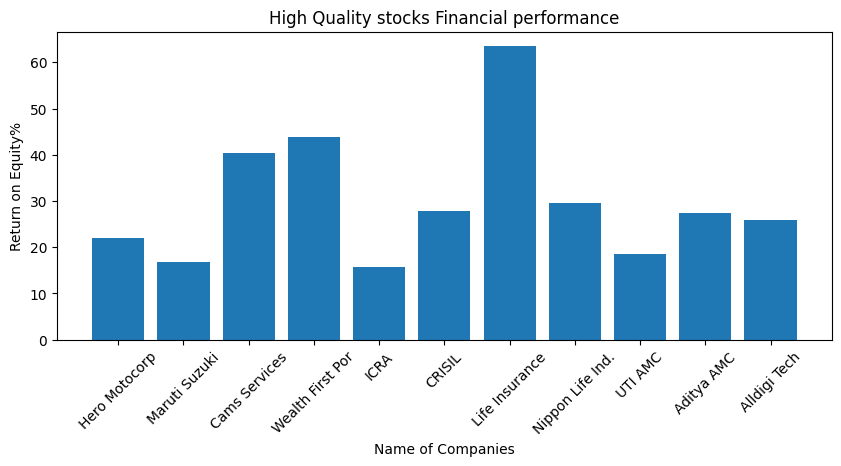

In [12]:
import matplotlib.pyplot as plt

x = df[df['is_high_quality'] == True]['name'].tolist()
y = df[df['is_high_quality'] == True]['roe_percent'].tolist()


plt.figure(figsize=(10,4))
plt.bar(x,y)
plt.title('High Quality stocks Financial performance')
plt.xlabel('Name of Companies')
plt.ylabel('Return on Equity%')
plt.xticks(rotation=45)
plt.show()

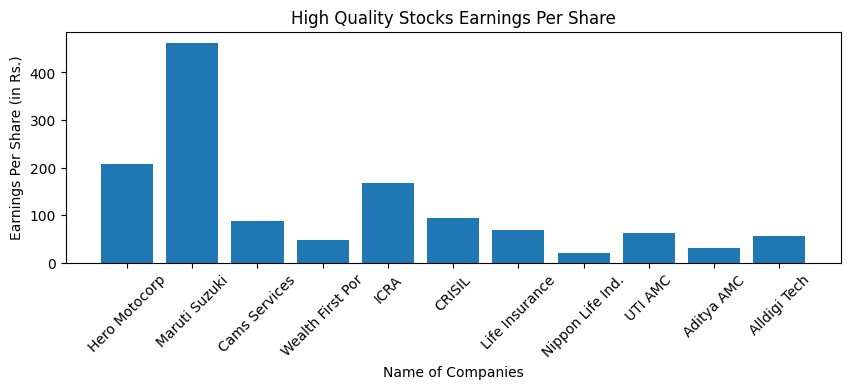

In [13]:
import matplotlib.pyplot as plt

x = df[df['is_high_quality'] == True]['name'].tolist()
y = df[df['is_high_quality'] == True]['eps_12m_rs'].tolist()

plt.figure(figsize=(10,3))
plt.bar(x,y)
plt.title('High Quality Stocks Earnings Per Share')
plt.xlabel('Name of Companies')
plt.ylabel('Earnings Per Share (in Rs.)')
plt.xticks(rotation=45)
plt.show()

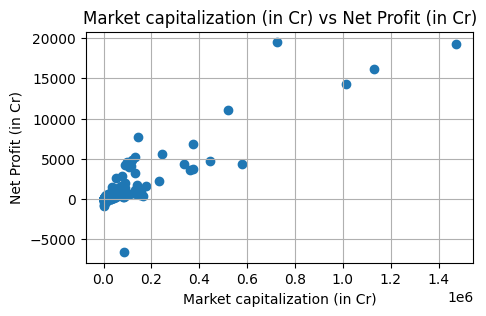

In [15]:
x = df['mar_cap_rscr']
y = df['np_qtr_rscr']


plt.figure(figsize=(5,3))
plt.scatter(x,y)
plt.xlabel('Market capitalization (in Cr)')
plt.ylabel('Net Profit (in Cr)')
plt.grid()
plt.title('Market capitalization (in Cr) vs Net Profit (in Cr)')
# plt.xticks(rotation=45)
plt.show()

In [23]:
market = df[df['is_high_quality'] == True]['mar_cap_rscr'].sum()
market

Decimal('1111452.34')

,id,name,cmp_rs,mar_cap_rscr,div_yld_percent,np_qtr_rscr,qtr_profit_var_percent,qtr_sales_var_percent,roce_percent,roe_percent,...,profit_growth_percent,no_of_share_holders,eps_12m_rs,ev_by_ebitda,rsi,current_ratio,debt_by_eq,is_high_quality,is_under_value,is_high_undervalued
0,1,CIE Automotive,416.2,15779.75,1.68,184.98,1.11,-5.82,16.59,13.15,...,-26.61,124238.0,21.81,10.75,56.86,1.13,0.09,False,False,False
1,2,HBL Engineering,525.65,14584.48,0.1,64.67,-20.27,-24.81,35.94,27.73,...,39.11,381826.0,11.31,30.73,59.0,2.67,0.05,False,True,False
2,3,Hero Motocorp,3940.5,78841.0,2.92,1108.38,1.51,4.82,29.09,21.95,...,11.33,947407.0,207.65,12.1,61.42,1.64,0.03,True,False,False
3,4,MRF,127980.0,54313.7,0.16,315.46,-38.11,13.6,16.12,12.55,...,-13.45,61320.0,4134.0,13.28,78.27,1.42,0.18,False,False,False
4,5,Hindustan Motors,27.73,584.19,0.0,3.34,-70.23,-56.93,2.32,16.74,...,238.7,268037.0,1.55,15.53,64.15,1.54,0.0,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
268,269,Alldigi Tech,973.8,1485.69,4.62,19.92,76.91,16.42,30.54,25.98,...,27.82,16772.0,55.61,10.66,55.83,3.39,0.15,True,True,True
269,270,Quadpro ITeS,3.7,18.7,0.0,0.4,185.71,0.73,6.38,4.31,...,64.62,850.0,0.21,5.29,51.01,8.32,0.0,False,False,False
270,271,Alphalogic Tech.,95.57,598.43,0.0,1.63,5.98,45.09,17.09,12.25,...,6.49,11843.0,0.76,67.31,48.5,3.92,0.2,False,False,False
271,272,Cadsys (India),82.25,82.27,0.0,-12.45,-250.31,-44.31,12.18,14.68,...,-129.24,964.0,-2.78,22.87,61.76,2.34,1.44,False,False,False


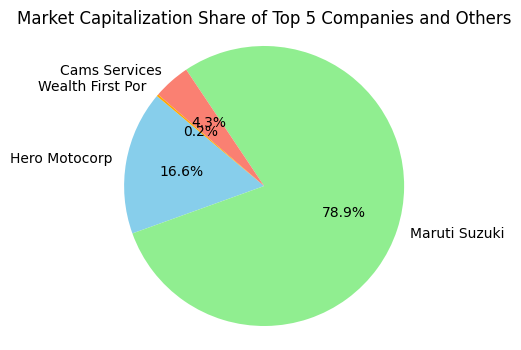

In [ ]:
import matplotlib.pyplot as plt
# Market Capitalization data (in cr)
companies = df[df['is_high_quality'] == True]['name'].head(4).tolist()+['others']
market_caps = df[df['is_high_quality'] == True]['mar_cap_rscr'].head(4).tolist()+[]
# market = df[df['is_high_quality'] == True]['mar_cap_rscr'].sum()
# Pie chart
colors = ['skyblue', 'lightgreen', 'salmon', 'orange', 'violet', 'grey']

plt.figure(figsize=(6,4))
plt.pie(market_caps, labels=companies, autopct='%1.1f%%', startangle=140, colors=colors)
plt.title('Market Capitalization Share of Top 5 Companies and Others')
plt.axis('equal')  # Equal aspect ratio ensures pie is circular
plt.show()

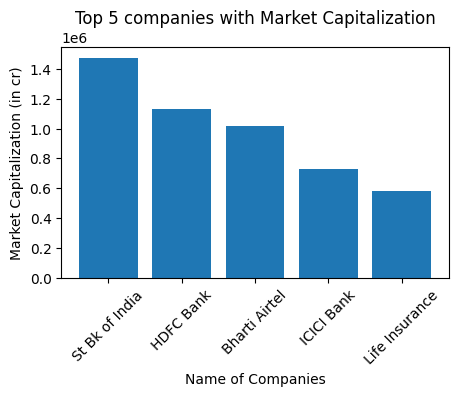

In [16]:
mar_cap = df.sort_values(by='mar_cap_rscr',ascending=False).head(5)['mar_cap_rscr']
name = df.sort_values(by='np_qtr_rscr',ascending=False).head(5)['name']

plt.figure(figsize=(5,3))
plt.bar(name,mar_cap)
plt.xlabel('Name of Companies')
plt.ylabel('Market Capitalization (in cr)')
plt.title('Top 5 companies with Market Capitalization')
plt.xticks(rotation=45)
plt.show()